In [62]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# Constants
NUM_CLASSES = 8

In [64]:
# Load in the data
# data = np.load('../data/segmentedPose.npy')
data = np.load('../data/segmentedPose_augmented.npy')
X = data[:,0:-1]
y = data[:,-1].astype(int)

# Convert y to categorical data
y = to_categorical(y, num_classes=NUM_CLASSES)

In [65]:
# Get training and test splits
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=31)

In [66]:
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(99,)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [67]:
# Compile the optimizer and model
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    # initial_learning_rate=0.0003,
    decay_steps=100,
    decay_rate=0.95
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [68]:
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [69]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16)
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=250, batch_size=32)

Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.3260 - loss: 1.8120 - precision: 0.5554 - recall: 0.0750 - val_accuracy: 0.2411 - val_loss: 1.9116 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5214 - loss: 1.3536 - precision: 0.7221 - recall: 0.2143 - val_accuracy: 0.3712 - val_loss: 1.6537 - val_precision: 0.6667 - val_recall: 0.0047
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5816 - loss: 1.1784 - precision: 0.7889 - recall: 0.3325 - val_accuracy: 0.5201 - val_loss: 1.4164 - val_precision: 0.9111 - val_recall: 0.0969
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6183 - loss: 1.0649 - precision: 0.7994 - recall: 0.3859 - val_accuracy: 0.5934 - val_loss: 1.2852 - val_precision: 0.8617 - val_recall: 0.1915
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6367 - loss: 1.0161 - precision: 0.8023 - recall: 0.4151 - val_accuracy: 0.5887 

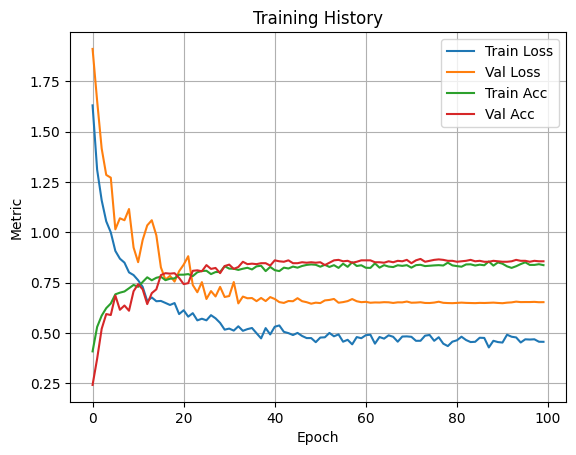

In [70]:
# Plot a training history graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
# plt.plot(history.history['precision'], label='Precision')
# plt.plot(history.history['recall'], label='Recall')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.title('Training History')
plt.grid(True)
plt.show()